In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install natasha

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 76.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=7da1ea697a8608400710486fb995b094cdc3af5f139543762edb0b588588f2c0
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26095 sha256=2813c0430c9d3a47b9c43f44429b63a99c92476746e4e483017450e305b64ec8
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built docopt intervaltree


In [3]:
from natasha import Doc, Segmenter, MorphVocab, NewsEmbedding, NewsMorphTagger
import cufflinks as cf
import pandas as pd
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
import cloudpickle
import matplotlib.pyplot as plt
import seaborn as sns

# Стоп-слова
stop_words = stopwords.words('russian')
stop_words.extend(['что', 'это', 'так',
                    'вот', 'быть', 'как',
                    'в', '—', 'к', 'за', 'из', 'из-за',
                    'на', 'ок', 'кстати',
                    'который', 'мочь', 'весь',
                    'еще', 'также', 'свой',
                    'ещё', 'самый', 'ул', 'комментарий',
                    'английский', 'язык'])

segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
def text_prep(text) -> str:
    doc = Doc(text) # Преобразуем текст в объект класса документ
    doc.segment(segmenter) # Сегментация
    doc.tag_morph(morph_tagger)

    for token in doc.tokens:  # Токенизация
        token.lemmatize(morph_vocab)

    lemmas = [_.lemma for _ in doc.tokens]  # Лемматизация
    words = [lemma for lemma in lemmas if lemma.isalpha() and len(lemma) > 2]
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)


def classification(df):
    df['title_clean'] = df.title.apply(text_prep)
    df['abstract_clean'] = df.abstract.apply(text_prep)
    df['text_clean'] = df.text.apply(text_prep)

    Log_Tf_Idf = pd.read_pickle(open('/content/drive/MyDrive/Colab Notebooks/For bot/Log_Tf_Idf.pkl', 'rb'))
    x_text = df.text_clean.str.split()

    df['Regions'] = Log_Tf_Idf.predict(x_text)
    df = df.replace(['asia-pacific', 'americas', 'africa', 'middle-east', 'europe'],['Asia', 'America', 'Africa', 'Midle East', 'Europe'])
    sns.set(style="darkgrid")
    fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(6,4))
    sns.countplot(y=df["Regions"], palette='tab10', ax=ax, order=df['Regions'].value_counts(ascending=False).index)
    plt.title('Number of news by regions')
    return fig

In [5]:
df = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/For bot/df_regions.p', compression='gzip')
df

,url,title,date,abstract,text
0,https://news.un.org/ru/story/2023/03/1438577,"Главные новости дня | пятница: Украина, группа...",2023-03-10,Коротко о главных событиях дня: доставка гуман...,Доставка гуманитарной помощи в город Часов Яр\...
1,https://news.un.org/ru/story/2023/03/1438567,Главные события в ООН и мире за неделю,2023-03-10,Главные события недели: Комиссия по положению ...,"Права женщин – под угрозой, заявил в понедельн..."
2,https://news.un.org/ru/story/2023/03/1438562,Глава ООН приветствовал восстановление отношен...,2023-03-10,Генеральный секретарь ООН Антониу Гутерриш при...,«Генеральный секретарь ООН приветствовал совме...
3,https://news.un.org/ru/story/2023/03/1438557,Независимый эксперт ООН: санкции США нарушают ...,2023-03-10,Независимый эксперт ООН по правам человека Але...,"Духан заявила, что эта практика является наруш..."
4,https://news.un.org/ru/story/2023/03/1438547,Сельское хозяйство Украины: ФАО помогает ферме...,2023-03-10,Около миллиона гектаров земель сельскохозяйств...,Глава офиса ФАО в Украине Пьер Вотье рассказал...
5,https://news.un.org/ru/story/2023/03/1438537,Глава ООН в преддверии первого Международного ...,2023-03-10,"Многообразие – это не угроза, а богатство, зая...",Исламофобия – не изолированное явление\nОн отм...
6,https://news.un.org/ru/story/2023/03/1438542,ВМО: площадь морского льда в Антарктике в февр...,2023-03-10,Площадь морского льда в Антарктике в феврале д...,В глобальном масштабе это был пятый самый тепл...
7,https://news.un.org/ru/story/2023/03/1438522,Исследование ВОЗ в Казахстане: COVID-19 по-раз...,2023-03-10,В Казахстане городские и сельские дети по-разн...,«Хотя мы часто получаем информацию от представ...
8,https://news.un.org/ru/story/2023/03/1438517,Независимые эксперты ООН призвали власти Росси...,2023-03-10,Сегодня независимые эксперты ООН по правам чел...,\n«Мы глубоко обеспокоены сообщениями о посе...
9,https://news.un.org/ru/story/2023/03/1438512,"ООН доставила гуманитарную помощь в Часов Яр, ...",2023-03-10,В пятницу гуманитарная автоколонна ООН достави...,"Жителям Часова Яра предоставили медикаменты, п..."


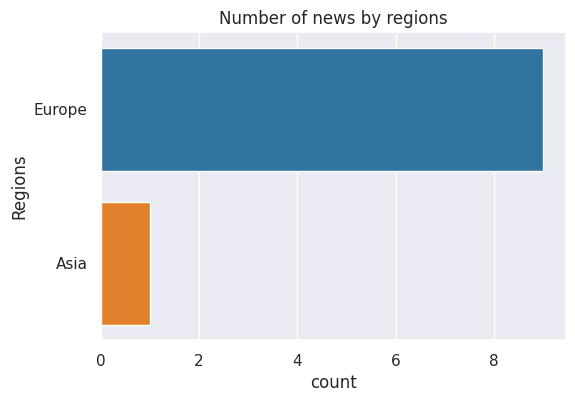

In [6]:
result = classification(df)

In [9]:
import cloudpickle


df['title_clean'] = df.title.apply(text_prep)
df['abstract_clean'] = df.abstract.apply(text_prep)
df['text_clean'] = df.text.apply(text_prep)
Log_Tf_Idf = cloudpickle.load(open('/content/drive/MyDrive/Colab Notebooks/For bot/Log_Tf_Idf.pkl', 'rb'))


#cloudpickle.dump(Log_Tf_Idf, open('Log_Tf_Idf.pkl', 'wb'))
result = df.text_clean.str.split()
s = Log_Tf_Idf.predict(result)
s
#df['regions']=['europe', 'europe', 'asia-pacific', 'europe', 'europe', 'europe', 'europe', 'europe', 'europe', 'europe']
#df

array(['europe', 'europe', 'asia-pacific', 'europe', 'europe', 'europe',
       'europe', 'europe', 'europe', 'europe'], dtype=object)